In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
%matplotlib inline

# Location of source data: https://www.kaggle.com/datasets/zynicide/wine-reviews

# load in data
wine = pd.read_csv('winemag-data-130k-v2.csv')
wine

# The three questions we will adress are: 
# 1) What country makes the best wine? -> Country - England, Province - Südburgenland (Austria)
# 2) What kind of relationship exists between price and score? 
    # I would have expected a much higher correlation than .44. How can I expand on this?
# 3) What features are the most important in predicting how a wine will score?

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [5]:
wine.drop(columns=['Unnamed: 0'], inplace= True)
wine.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [4]:
# Are we dealing with any null values?
def checkNulls(df):
    '''take in a dataframe check for any missing columns. If there are any columns with missing values alert the user'''
    no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.
    if len(no_nulls) == len(df.columns):
        return
    else:
        print("There are missing columns in the data set. Here are the columns with missing values:")
        nulls = set(df.columns[df.isnull().mean()!=0])
        print(nulls)
 
# As we can see from the output, there are missing values. We will deal with them below.    
checkNulls(wine)

There are missing columns in the data set. Here are the columns with missing values:
{'province', 'country', 'taster_name', 'taster_twitter_handle', 'region_2', 'price', 'designation', 'region_1', 'variety'}


In [5]:
# Considering our business questions -> We will drop the following columns
    # Country, price
# We will replace 
    # variety,region_2,taster_twitter_handle,province,region_1,designation,tastername : ' '
wine.dropna(subset=['price','country'], inplace= True)
wine['region_2'] = wine['region_2'].fillna(value = '')
wine['variety'] = wine['variety'].fillna(value = '')
wine['taster_twitter_handle'] = wine['taster_twitter_handle'].fillna(value = '')
wine['province'] = wine['province'].fillna(value = '')
wine['region_1'] = wine['region_1'].fillna(value = '')
wine['designation'] = wine['designation'].fillna(value = '')
wine['taster_name'] = wine['taster_name'].fillna(value = '')

checkNulls(wine)


In [6]:
# Let us start by answering our first question:
temp = wine[['country', 'price', 'points']]
countryGroup = temp.groupby('country').mean()
countryGroup.sort_values(by=['points'], ascending=False)

,price,points
country,,
England,51.681159,91.550725
India,13.333333,90.222222
Austria,30.762772,90.190782
Germany,42.257547,89.836321
Canada,35.712598,89.377953
Hungary,40.648276,89.165517
China,18.000000,89.000000
France,41.139120,88.734867
Luxembourg,23.333333,88.666667


In [7]:
temp = wine[['province', 'price', 'points']]
provinceGroup = temp.groupby('province').mean()
provinceGroup.sort_values(by=['points'], ascending=False)

,price,points
province,,
Südburgenland,57.000000,94.000000
Madeira,115.181818,93.909091
Mittelrhein,30.500000,92.250000
Puente Alto,84.500000,91.857143
Wachau,45.902597,91.665584
...,...,...
Kentucky,35.000000,83.000000
Iowa,15.500000,83.000000
Middle and South Dalmatia,65.000000,82.000000


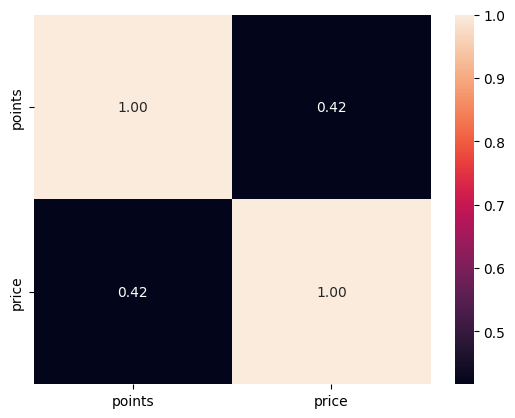

In [6]:
# Generate a heatmap to see correlation between variables in our dataframe 
# Anwer our second question.
numeric = wine.select_dtypes(include=['int','float']) 
sns.heatmap(numeric.corr(), annot=True, fmt=".2f");

In [9]:
wine.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [14]:
# Not much information can be gleened from this. Lets encode our data and see 
    # Note: I am removing the tester_name field and the taster_twitter_handle. I am assuming tasters are unbiased
    # Also removing the region one and region two fields.
    
# Play around with smaller subsets of below. Encoding all of these takes a long time to run. 
province = pd.get_dummies(wine['province'], drop_first= True)
country = pd.get_dummies(wine['country'], drop_first= True)
description = pd.get_dummies(wine['description'], drop_first= True)
designtaion = pd.get_dummies(wine['designation'], drop_first= True)
variety = pd.get_dummies(wine['variety'], drop_first= True)
winery = pd.get_dummies(wine['winery'], drop_first= True)

wine.drop(columns=['province','country','description','designation','variety','winery','region_1','region_2','taster_name','taster_twitter_handle']
          , inplace=True)
encodedWine = pd.concat([wine,province,country,description,designtaion,variety,winery], axis= 1)
print(encodedWine.shape) # Lots of extra columns -> How will this effect our model?


In [11]:
sns.heatmap(encodedWine.corr(), annot=True)

ValueError: could not convert string to float: 'Nicosia 2013 Vulkà Bianco  (Etna)'

KeyError: 'country'

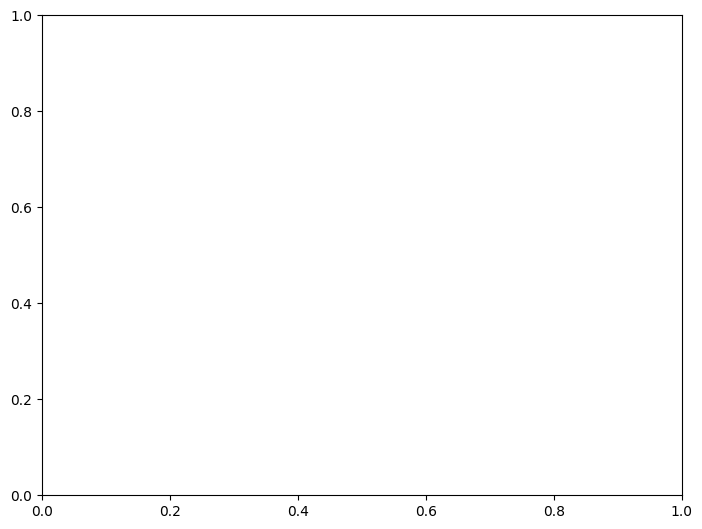

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(countryGroup['country'],countryGroup['points'])
plt.show

In [ ]:
# Start to answer #3 
